In [517]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import spearmanr,pearsonr

In [518]:
# import libraries and import csv file
df = pd.read_csv("life_expectancy.csv")
df.head()

,Country,Year,"Mean Years of Schooling, female (years)","Share of seats in parliament, male (% held by men)",Mean Years of Schooling (years),Inequality in income,Carbon dioxide emissions per capita (production) (tonnes),"Expected Years of Schooling, male (years)",Expected Years of Schooling (years),"Labour force participation rate, female (% ages 15 and older)",...,Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),Total Deaths (thousands),Male Deaths (thousands),Female Deaths (thousands),"Crude Death Rate (deaths per 1,000 population)","Life Expectancy at Birth, both sexes (years)",Live births Surviving to Age 1 (thousands),Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,Afghanistan,1990,0.342503,NaN,0.971125,NaN,0.209727,3.939093,2.50405,15.180,...,29.880,105.5,203.514,110.102,93.412,18.449,45.9672,519.005,-666.001,-60.375
1,Afghanistan,1991,0.371860,NaN,1.019356,NaN,0.182525,4.171640,2.80655,15.214,...,29.812,105.6,192.531,104.274,88.257,17.946,46.6631,509.662,39.926,3.721
2,Afghanistan,1992,0.401218,NaN,1.067586,NaN,0.095233,4.417915,3.10905,15.223,...,29.885,105.6,191.913,104.633,87.280,17.222,47.5955,532.989,1834.556,164.629
3,Afghanistan,1993,0.430575,NaN,1.115817,NaN,0.084285,4.678730,3.41155,15.197,...,29.948,105.6,199.165,104.343,94.822,14.838,51.4664,646.635,1171.818,87.304
4,Afghanistan,1994,0.459933,NaN,1.164047,NaN,0.075054,4.954942,3.71405,15.178,...,29.789,105.7,222.214,119.122,103.092,14.689,51.4945,732.684,665.410,43.986


In [519]:
# handle missing values
if df.isnull().any().sum() > 0:
    print("Handling missing values...")
    # fill missing values for numeric columns with median
    numeric_cols = df.select_dtypes(include="number").columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

base_data = df.drop(columns=["Life Expectancy at Birth, both sexes (years)"])
base_data_label = df["Life Expectancy at Birth, both sexes (years)"]

train_data, test_data, train_data_label, test_data_label = train_test_split(
    base_data, base_data_label, test_size=0.2, random_state=42
)

print("Train-test split successful")

Handling missing values...
Train-test split successful


In [520]:
target_variable = "Life Expectancy at Birth, both sexes (years)"

In [521]:
# 2a
# by default .corr uses pearson correlation
correlation_with_target = df.corr(numeric_only=True)[
    "Life Expectancy at Birth, both sexes (years)"
].sort_values(ascending=False)

strongest_correlation_variable = correlation_with_target.index[1]
strongest_correlation_value = correlation_with_target.iloc[1]

print("Variable with strongest correlation:", strongest_correlation_variable)
print("Pearson Correlation Coefficient:", strongest_correlation_value)

Variable with strongest correlation: Human Development Index (value)
Pearson Correlation Coefficient: 0.9187297155767722


Coefficient of Determination (R^2): 0.8433493090941087
Intercept: 34.6046241980718
Coefficient: 51.42339337580662


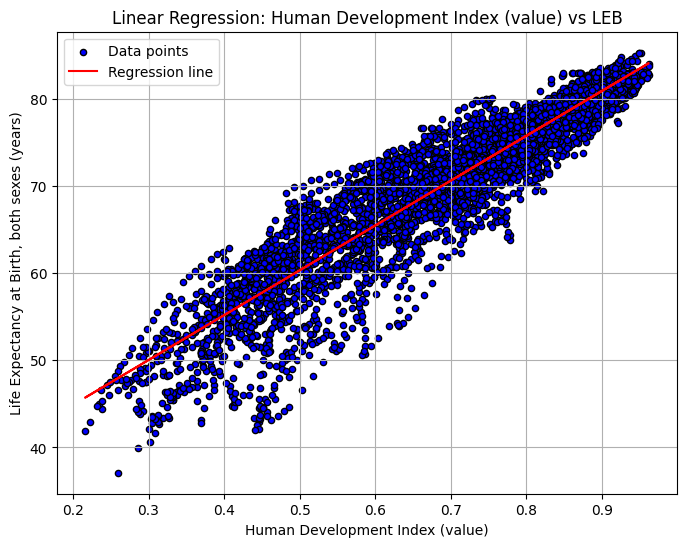

In [522]:
# 2b
strongest_relation_train = train_data[[strongest_correlation_variable]]

model = LinearRegression()
model.fit(strongest_relation_train, train_data_label)

predection_matrix_train = model.predict(strongest_relation_train)

# calculate R^2 (coefficient of determination)
prob_2_r2 = r2_score(train_data_label, predection_matrix_train)

intercept = model.intercept_
coefficient = model.coef_[0]

print("Coefficient of Determination (R^2):", prob_2_r2)
print("Intercept:", intercept)
print("Coefficient:", coefficient)

# scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(
    strongest_relation_train,
    train_data_label,
    edgecolor="black",
    facecolor="blue",
    s=20,
    label="Data points",
)
plt.plot(
    strongest_relation_train,
    predection_matrix_train,
    color="red",
    label="Regression line",
)
plt.title(f"Linear Regression: {strongest_correlation_variable} vs LEB")
plt.xlabel(strongest_correlation_variable)
plt.ylabel("Life Expectancy at Birth, both sexes (years)")
plt.legend()
plt.grid()
plt.show()

In [523]:
# 2c
strongest_relation_test = test_data[[strongest_correlation_variable]]

predection_matrix_test = model.predict(strongest_relation_test)

# .ravel converts [[1, 2, 3], [4, 5, 6]] to [1, 2, 3, 4, 5, 6]
correlation = np.corrcoef(predection_matrix_test, test_data_label.values.ravel())
prob_2_mse = mean_squared_error(test_data_label, predection_matrix_test)

# np.corrcoef returns a 2 by 2 matrix. diagonal elemnts is correlation value
print("Correlation between predicted and true values: ", correlation[0, 1])
print("Mean Squared Error (MSE): ", prob_2_mse)

Correlation between predicted and true values:  0.9203870016306658
Mean Squared Error (MSE):  12.519251362188527


In [524]:
# prob3.
# selecting a non linear but monotonic relation ship with target variable
def find_nonlinear_rel(col):
    pearson_corr = train_data[col].corr(train_data_label, method="pearson")
    spearman_corr = train_data[col].corr(train_data_label, method="spearman")

    return {
        "Variable": col,
        "Spearman": spearman_corr,
        "Pearson": pearson_corr,
        "Difference": abs(spearman_corr) - abs(pearson_corr),
    }

In [525]:
results = []
# using juse train_data.columns gives error: could not convert string to float: 'Mauritius'
for col in train_data.select_dtypes(include=["number"]).columns:
    results.append(find_nonlinear_rel(col))
results_df = pd.DataFrame(results)

# we check spearman greate than 0.7 to have a strong monotonic relationship
# pearson cooefficient gives the linear cooreleation
# difference of spearman-pearson if higher means pearson cooefficient is less meaning
# less linear relationship
non_linear_monotonic_vars = results_df[
    (results_df["Spearman"].abs() > 0.7) & (results_df["Difference"] > 0.2)
]

# Sort by Spearman correlation
non_linear_monotonic_vars = non_linear_monotonic_vars.sort_values(
    by="Spearman", ascending=False
)

non_linear_monotonic_vars

,Variable,Spearman,Pearson,Difference
21,Gross National Income Per Capita (2017 PPP$),0.864828,0.651471,0.213357
5,Carbon dioxide emissions per capita (productio...,0.761487,0.456699,0.304788


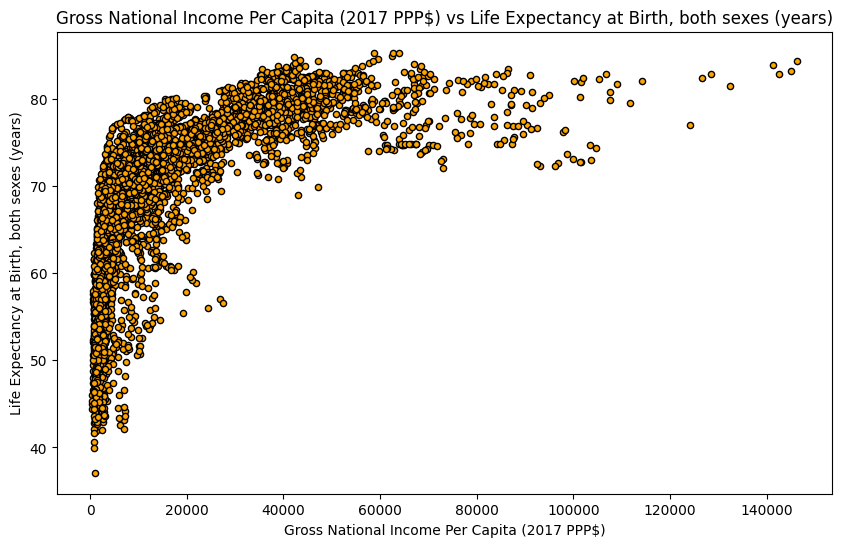

In [526]:
plt.figure(figsize=(10, 6))
#taking the first value
candidate_variable = "Gross National Income Per Capita (2017 PPP$)"

plt.scatter(
    x=train_data[candidate_variable],
    y=train_data_label,
    edgecolor="black",
    facecolor="orange",
    s=20,
)


plt.title(f"{candidate_variable} vs {target_variable}")
plt.xlabel(candidate_variable)
plt.ylabel(target_variable)
plt.show()

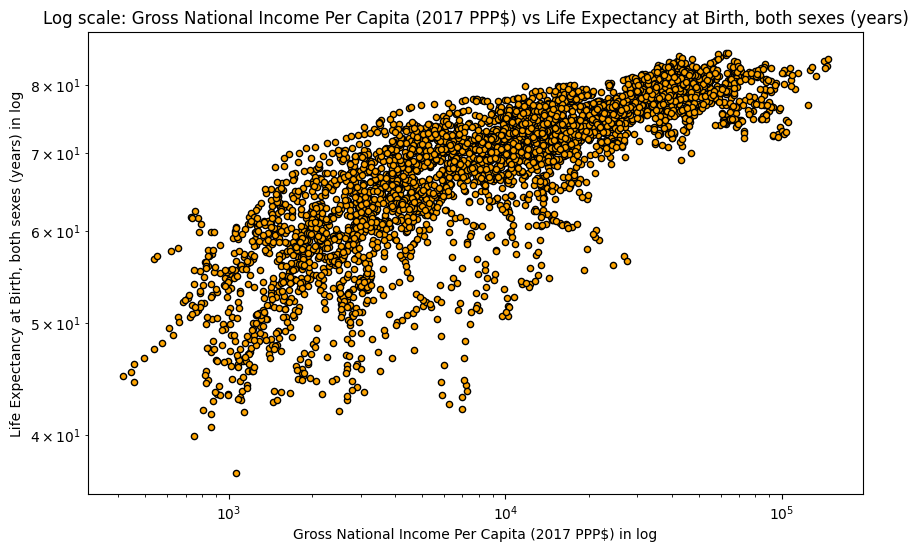

In [527]:
plt.figure(figsize=(10, 6))

plt.scatter(
    x=train_data[candidate_variable],
    y=train_data_label,
    edgecolor="black",
    facecolor="orange",
    s=20,
)
plt.xscale("log")
plt.yscale("log")


plt.title(f"Log scale: {candidate_variable} vs {target_variable}")
plt.xlabel(f"{candidate_variable} in log")
plt.ylabel(f"{target_variable} in log")
plt.show()

In [528]:
# Pearson Correlation
pearson_corr = train_data[candidate_variable].corr(train_data_label, method="pearson")
print(
    f"Pearson correlation between {candidate_variable} and {target_variable}: {pearson_corr}"
)

# Spearman Correlation
spearman_corr = train_data[candidate_variable].corr(train_data_label, method="spearman")
print(
    f"Spearman correlation between {candidate_variable} and {target_variable}: {spearman_corr}"
)

Pearson correlation between Gross National Income Per Capita (2017 PPP$) and Life Expectancy at Birth, both sexes (years): 0.6514708331957301
Spearman correlation between Gross National Income Per Capita (2017 PPP$) and Life Expectancy at Birth, both sexes (years): 0.8648281379988499


In [529]:
# Logarithmic Transformation
train_data["log_transform"] = np.log(
    train_data[candidate_variable] + abs(train_data[candidate_variable]).min() + 1
)

test_data["log_transform"] = np.log(
    test_data[candidate_variable] + abs(test_data[candidate_variable]).min() + 1
)

In [530]:
# Pearson Correlation
check_against = "log_transform"
pearson_corr = train_data[check_against].corr(train_data_label, method="pearson")
print(
    f"Pearson correlation between {check_against} and {target_variable}: {pearson_corr}"
)

# Spearman Correlation
spearman_corr = train_data[check_against].corr(train_data_label, method="spearman")
print(
    f"Spearman correlation between {check_against} and {target_variable}: {spearman_corr}"
)

Pearson correlation between log_transform and Life Expectancy at Birth, both sexes (years): 0.8286706182772113
Spearman correlation between log_transform and Life Expectancy at Birth, both sexes (years): 0.8648281379988499


In [531]:
# Filter numeric columns and drop the target itself
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
candidate_variables = [
    col for col in numeric_columns if col != strongest_correlation_variable
]
candidate_variables

['Year',
 'Mean Years of Schooling, female (years)',
 'Share of seats in parliament, male (% held by men)',
 'Mean Years of Schooling (years)',
 'Inequality in income',
 'Carbon dioxide emissions per capita (production) (tonnes)',
 'Expected Years of Schooling, male (years)',
 'Expected Years of Schooling (years)',
 'Labour force participation rate, female (% ages 15 and older)',
 'Population with at least some secondary education, female (% ages 25 and older)',
 'Expected Years of Schooling, female (years)',
 'Adolescent Birth Rate (births per 1,000 women ages 15-19)',
 'Material footprint per capita (tonnes)',
 'Mean Years of Schooling, male (years)',
 'Population with at least some secondary education, male (% ages 25 and older)',
 'Share of seats in parliament, female (% held by women)',
 'Inequality in eduation',
 'Gender Development Index (value)',
 'Coefficient of human inequality',
 'Labour force participation rate, male (% ages 15 and older)',
 'Gross National Income Per Capit

In [532]:
# metric against target variable
def get_model_metric(candidates):
    X = train_data[candidates].values
    y = train_data_label  # [target_variable].values

    model = LinearRegression()
    model.fit(X, y)

    y_train_pred = model.predict(X)

    r2 = r2_score(y, y_train_pred)
    mse = mean_squared_error(y, y_train_pred)

    y_test_pred = model.predict(test_data[candidates].values)
    test_mse = mean_squared_error(test_data_label, y_test_pred)
    pearson_corr, _ = pearsonr(test_data_label, y_test_pred)

    # R2: Coefficient of Determination
    # MSE: mean squared error
    # coefficient: slop of regression line
    # intercept: regresssion line y axis intercept
    # candidate_variable_str = ', '.join([str(item[0]) for item in candidate_variables])
    candidate_str = ", ".join(candidates)
    return {
        "Variable": candidate_str,
        "train data R2": r2,
        "train data MSE": mse,
        "pred v actual MSE": test_mse,
        "pred v actual pearson corr": pearson_corr,
        "Coefficient": model.coef_,
        "Intercept": model.intercept_,
    }

In [533]:
# train_data, test_data, train_data_label, test_data_label
results = []
for cv in candidate_variables:
    results.append(get_model_metric([cv]))
results_df = pd.DataFrame(results)

# Sort by R^2 in descending order. best r2 score first
sorted_results = results_df.sort_values(by="train data R2", ascending=False)

sorted_results.head()

,Variable,train data R2,train data MSE,pred v actual MSE,pred v actual pearson corr,Coefficient,Intercept
35,"Crude Birth Rate (births per 1,000 population)",0.746734,21.612374,22.150347,0.854689,[-0.7028588286235612],85.242717
36,Total Fertility Rate (live births per woman),0.703341,25.315337,25.212474,0.832423,[-4.856022470918639],83.849406
47,log_transform,0.686695,26.735792,24.959592,0.833647,[6.889005120152066],5.540614
11,"Adolescent Birth Rate (births per 1,000 women ...",0.639459,30.766688,30.296935,0.793686,[-0.1610021213145851],78.345453
7,Expected Years of Schooling (years),0.639434,30.768815,28.549798,0.806918,[2.218844409354702],42.105570


In [534]:
# find a good model that outperforms the single variable model
for i in range(1, len(candidate_variables)):
    top_variables = sorted_results["Variable"].head(i).tolist()
    comb_model_metrics = get_model_metric(top_variables)
    if comb_model_metrics["train data R2"] > prob_2_r2:
        break

In [535]:
comb_model_metrics

{'Variable': 'Crude Birth Rate (births per 1,000 population), Total Fertility Rate (live births per woman), log_transform, Adolescent Birth Rate (births per 1,000 women ages 15-19), Expected Years of Schooling (years), Expected Years of Schooling, female (years), Median Age, as of 1 July (years), Net Reproduction Rate (surviving daughters per woman)',
 'train data R2': 0.8815633649159162,
 'train data MSE': np.float64(10.106755876051684),
 'pred v actual MSE': np.float64(10.399592319797634),
 'pred v actual pearson corr': np.float64(0.9344246974943984),
 'Coefficient': array([-3.89724681e-01, -9.88362950e+00,  1.90638381e+00, -1.07051217e-02,
         2.93376972e-01, -2.61906186e-01,  2.98152842e-01,  2.84437400e+01]),
 'Intercept': np.float64(45.087181883644604)}

In [536]:
if comb_model_metrics["train data MSE"] < prob_2_mse and comb_model_metrics["train data R2"] > prob_2_r2:
    print(
        "The multi-variable model outperforms the single-variable model based on MSE and R2."
    )
else:
    print(
        "The single-variable model outperforms the multi-variable model based on MSE and R2."
    )

The multi-variable model outperforms the single-variable model based on MSE and R2.
